## Exploration Data Analysis

In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
%matplotlib inline
import seaborn as sns
from statsmodels.stats import weightstats 
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/findata-creditscoring/credit__sample.xls
/kaggle/input/findata-creditscoring/credit_train.xls
/kaggle/input/findata-creditscoring/credit_test.xls
/kaggle/input/findata-creditscoring/credit__sample.csv
/kaggle/input/findata-creditscoring/credit_test.csv
/kaggle/input/findata-creditscoring/credit_train.csv


In [3]:
DATA_DIR = '../input/findata-creditscoring/'
train = pd.read_csv(DATA_DIR + 'credit_train.csv')
test = pd.read_csv(DATA_DIR + 'credit_test.csv')
sample_submission = pd.read_csv(DATA_DIR + 'credit__sample.csv')

### Описание полей

- <b>Loan ID</b>: уникальный идентификатор кредита;
- <b>Customer ID</b>: уникальный идентификатор клиента;
- <b>Loan Status</b>: категориальный признак (<b>целевая переменная</b>)- кредит погашен ("Fully Paid") или не погашен ("Charged Off");
- <b>Current Loan Amount</b>: размер кредита;
- <b>Term</b>: срок кредита;
- <b>Credit Score</b>: кредитный рейтинг - число от 0 до 800;
- <b>Years in current job</b>: стаж на текущем месте работы;
- <b>Home Ownership</b>: статус недвижимости - собственность ("Own"), ипотека ("Home Mortgage") или аренда ("Rent");
- <b>Annual Income</b>: годовой доход;
- <b>Purpose</b>: цель кредита;
- <b>Monthly Debt</b>: размер ежемесячного платежа по текущим кредитам;
- <b>Years of Credit History</b>: количество лет кредитной истории;
- <b>Months since last delinquent</b>: количество месяцев с последнего нарушения условий кредита;
- <b>Number of Open Accounts</b>: количество открытых кредитных карт;
- <b>Number of Credit Problems</b>: количество кредитных проблем;
- <b>Current Credit Balance</b>: суммарный текущий долг;
- <b>Maximum Open Credit</b>: максимальный кредитный лимит из всех источников;
- <b>Bankruptcies</b>: количество банкротств;
- <b>Tax Liens</b>: количество нарушений налогового законодательства.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  int64  
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null 

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       10000 non-null  object 
 1   Customer ID                   10000 non-null  object 
 2   Current Loan Amount           10000 non-null  int64  
 3   Term                          10000 non-null  object 
 4   Credit Score                  8019 non-null   float64
 5   Annual Income                 8019 non-null   float64
 6   Years in current job          9573 non-null   object 
 7   Home Ownership                10000 non-null  object 
 8   Purpose                       10000 non-null  object 
 9   Monthly Debt                  10000 non-null  float64
 10  Years of Credit History       10000 non-null  float64
 11  Months since last delinquent  4694 non-null   float64
 12  Number of Open Accounts       10000 non-null  int64  
 13  Nu

In [6]:
train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0


In [7]:
train.nunique()

Loan ID                         81999
Customer ID                     81999
Loan Status                         2
Current Loan Amount             22004
Term                                2
Credit Score                      324
Annual Income                   36174
Years in current job               11
Home Ownership                      4
Purpose                            16
Monthly Debt                    65765
Years of Credit History           506
Months since last delinquent      116
Number of Open Accounts            51
Number of Credit Problems          14
Current Credit Balance          32730
Maximum Open Credit             44596
Bankruptcies                        8
Tax Liens                          12
dtype: int64

In [8]:
train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


#### Дубликаты данных

In [9]:
print('Количество дубликатов (всех, кроме первого вхождения) -', len(train[train.duplicated(keep = 'first')]))

Количество дубликатов (всех, кроме первого вхождения) - 10215


Удаляем дубликаты:

In [10]:
train.drop_duplicates(keep='first', inplace = True)

In [11]:
train.shape

(89785, 19)

#### Целевая переменная

In [12]:
train['Loan Status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

Заменим строковые значения целевой переменной на 1 и 0:

In [13]:
train['Loan Status'] = train['Loan Status'].map({"Fully Paid": 1, "Charged Off": 0})

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

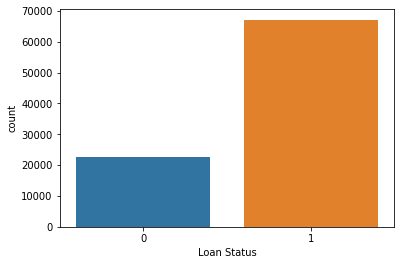

In [14]:
sns.countplot(x = 'Loan Status', data = train)

In [15]:
paid = train[train['Loan Status'] == 1].shape[0]
default = train[train['Loan Status'] == 0].shape[0]
print(f"Paid examples = {paid}")
print(f"Default examples = {default}")
print(f"Proportion of paid to default examples = {(default / paid) * 100:.2f}%")

Paid examples = 67146
Default examples = 22639
Proportion of paid to default examples = 33.72%


Наблюдается относительно невысокая степень несбалансированности классов. 

#### Размер кредита

<AxesSubplot:xlabel='Loan Status', ylabel='Current Loan Amount'>

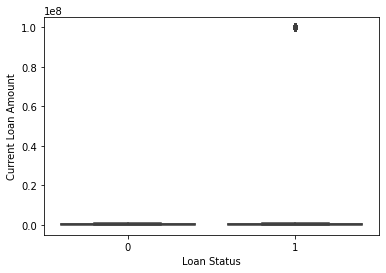

In [16]:
sns.boxplot(data = train, x = 'Loan Status', y = 'Current Loan Amount')

На рисунке видно присутствие выбросов. Посмотрим на них. 

In [17]:
train[train['Current Loan Amount']>900000]['Current Loan Amount'].value_counts()

99999999    11484
Name: Current Loan Amount, dtype: int64

Наблюдается всего одно уникальное значение размера кредита, большего 900000 - 99999999.

При этом значении статус кредита всегда одинаков и равен 1 (кредит погашен):

In [18]:
train[train['Current Loan Amount']>900000]['Loan Status'].value_counts()

1    11484
Name: Loan Status, dtype: int64

Посмотрим на распределение данных без выбросов:

<AxesSubplot:xlabel='Loan Status', ylabel='Current Loan Amount'>

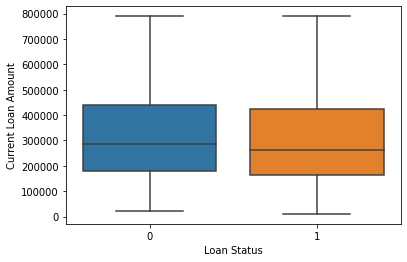

In [19]:
sns.boxplot(data = train[train['Current Loan Amount']<=900000],
            x = 'Loan Status', 
            y = 'Current Loan Amount'
            )

Средний размер кредита у клиентов, погасивших кредит, немного меньше по сравнению со средним размером кредита дефолтных клиентов.

<AxesSubplot:xlabel='Current Loan Amount', ylabel='Count'>

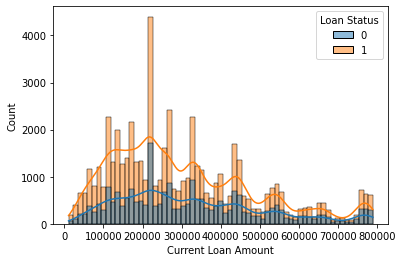

In [20]:
sns.histplot(train[train['Current Loan Amount'] <= 900000], 
             x = 'Current Loan Amount', 
             hue = 'Loan Status', 
             kde = True)

Характеры распределения размеров кредитов близки в случае добросоветных и дефолтных клиентов. 

#### Срок кредита

<AxesSubplot:xlabel='Term', ylabel='count'>

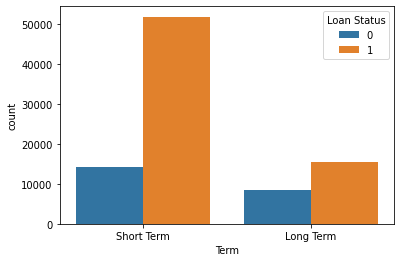

In [21]:
sns.countplot(data = train, x = 'Term', hue = 'Loan Status')

Долгосрочные кредиты гасятся хуже. 

#### Кредитный рейтинг

<AxesSubplot:xlabel='Loan Status', ylabel='Credit Score'>

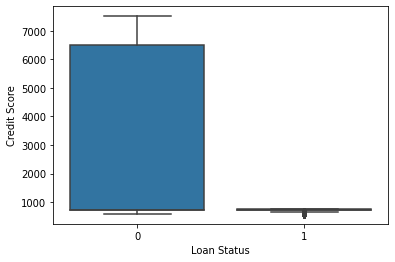

In [22]:
sns.boxplot(data = train, x = 'Loan Status', y = 'Credit Score')

In [23]:
train[train['Credit Score'] > 800]['Loan Status'].value_counts()

0    4551
Name: Loan Status, dtype: int64

По условию значения кредитного рейтинга должны лежать в диапазоне от 0 до 800. В датасете присутствуют данные со значением кредитного рейтинга более 800. При этом в этих случаях кредит всегда остается непогашенным. Посмотрим на распределение данных без выбросов:

In [24]:
train[train['Credit Score'] <= 800]['Loan Status'].value_counts()

1    53421
0    12659
Name: Loan Status, dtype: int64

<AxesSubplot:xlabel='Loan Status', ylabel='Credit Score'>

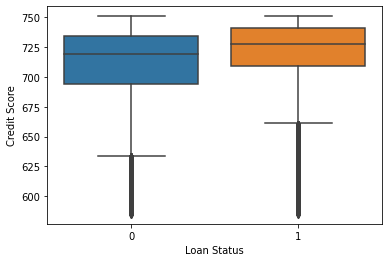

In [25]:
sns.boxplot(data = train[train['Credit Score'] <= 800], 
            x = 'Loan Status', 
            y = 'Credit Score')

Средний кредитный рейтинг добросовестных клиентов выше, чем у дефолтных. 

<AxesSubplot:xlabel='Credit Score', ylabel='Count'>

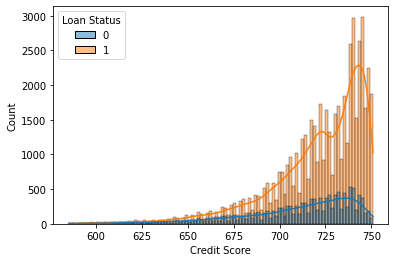

In [26]:
sns.histplot(train[train['Credit Score'] <= 800], 
             x = 'Credit Score', 
             hue = 'Loan Status', 
             kde = True)

Посмотрим более подробно на клиентов с кредитным рейтингом менее 650:

<AxesSubplot:xlabel='Credit Score', ylabel='Count'>

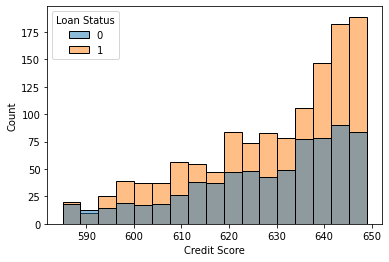

In [27]:
sns.histplot(train[train['Credit Score'] < 650],x = 'Credit Score', 
             hue = 'Loan Status')

#### Стаж на текущем месте работы

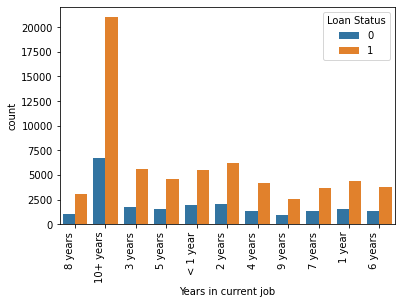

In [28]:
fig, ax = plt.subplots()
sns.countplot(data = train, x = 'Years in current job', hue = 'Loan Status')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, horizontalalignment='right')
plt.show()

Соотношение количества добросовестных клиентов к дефолтным при различных стажах составляет примерно от 2:1 до 3:1.

#### Статус недвижимости

<AxesSubplot:xlabel='Home Ownership', ylabel='count'>

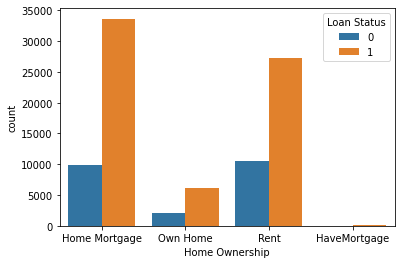

In [29]:
sns.countplot(data = train, x = 'Home Ownership', hue = 'Loan Status')

Хуже всего отдаются кредиты в случае, если клиент арендует жилье. В этом случае соотношение количества добросоветных клиентов к количеству дефолтных клиентов минимально. 

#### Годовой доход

<AxesSubplot:xlabel='Loan Status', ylabel='Annual Income'>

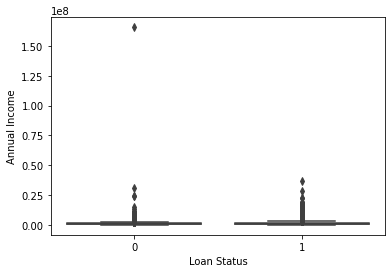

In [30]:
sns.boxplot(data = train, x = 'Loan Status', y = 'Annual Income')

In [31]:
train[train['Annual Income'] > 50000000]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
85662,6dfd2f9c-b796-4cb3-8f71-04d6ae8a8f92,ceee183a-9b02-4b82-ae53-14ccd5f785fd,0,176132,Short Term,7250.0,165557393.0,10+ years,Home Mortgage,Debt Consolidation,15176.06,16.0,NaN,11,0,312778,669438.0,0.0,0.0


<AxesSubplot:xlabel='Loan Status', ylabel='Annual Income'>

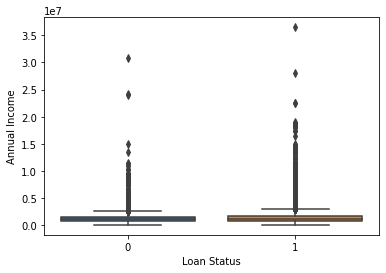

In [32]:
sns.boxplot(data = train[train['Annual Income'] < 50000000],
            x = 'Loan Status', 
            y = 'Annual Income')

<AxesSubplot:xlabel='Annual Income', ylabel='Count'>

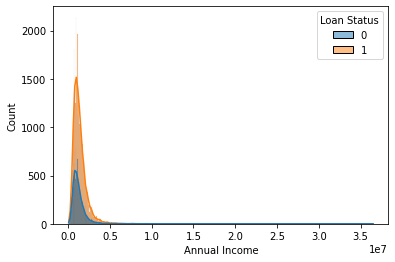

In [33]:
sns.histplot(
    train[train['Annual Income'] <= 50000000],
    x='Annual Income', hue='Loan Status', kde = True)

<AxesSubplot:xlabel='Annual Income', ylabel='Count'>

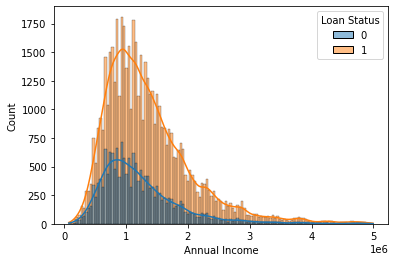

In [34]:
sns.histplot(
    train[train['Annual Income'] <= 5000000],
    x='Annual Income', hue='Loan Status', kde = True)

Характер распределения примерно одинаков для добросовестных и дефолтных клиентов. Но максимум для дефолтников немного смещен влево относительно максимума добросовестных клиентов. 

<AxesSubplot:xlabel='Annual Income', ylabel='Current Loan Amount'>

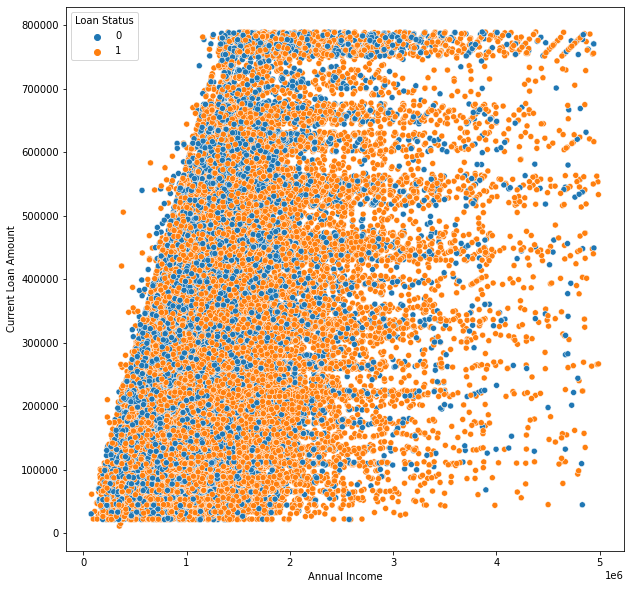

In [35]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.scatterplot(data = train[(train['Current Loan Amount']<=900000)
                            & (train['Annual Income'] <= 5000000)], 
                x = 'Annual Income', 
                y = 'Current Loan Amount', 
                hue = 'Loan Status')

Видно, что есть ограничение на размер кредита в зависимости от годового дохода. 

<AxesSubplot:xlabel='Annual Income', ylabel='Credit Score'>

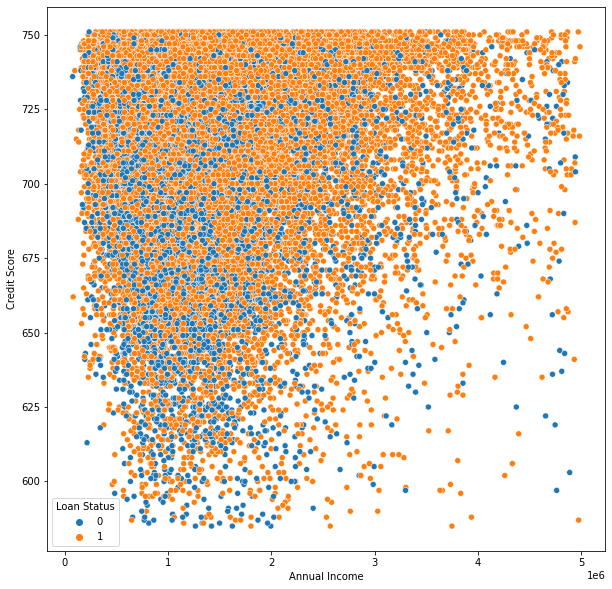

In [36]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.scatterplot(data = train[(train['Current Loan Amount']<=900000)
                            & (train['Annual Income'] <= 5000000)
                             & (train['Credit Score'] <= 800)], 
                x = 'Annual Income', 
                y = 'Credit Score', 
                hue = 'Loan Status')

#### Цель кредита

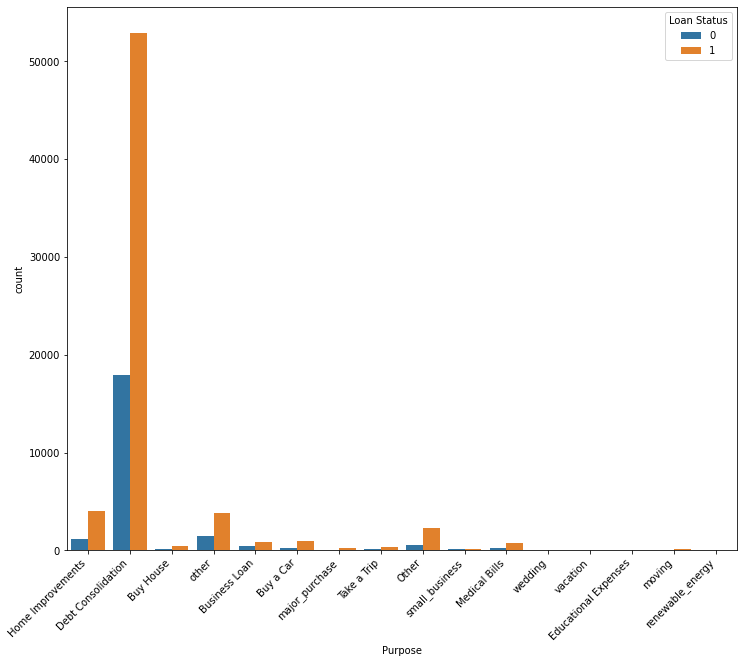

In [37]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.countplot(x = 'Purpose', data = train, hue = 'Loan Status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

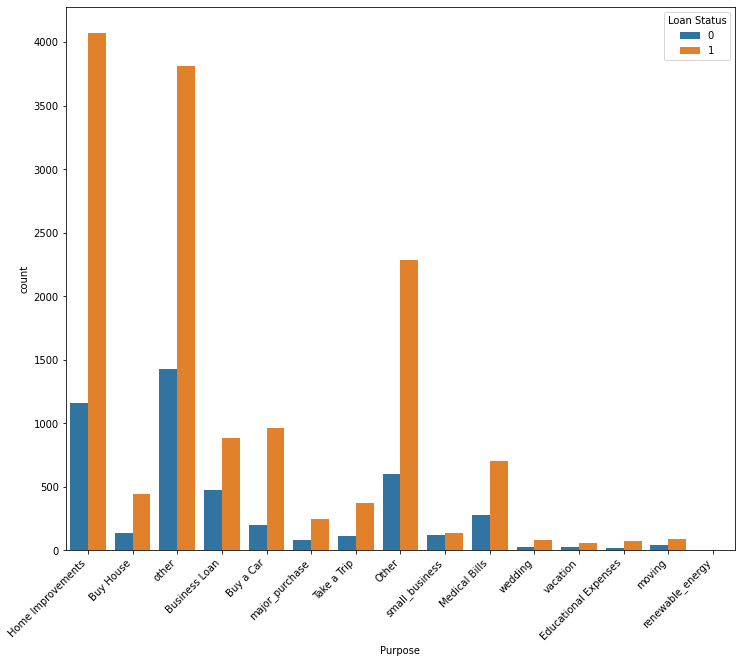

In [38]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.countplot(x = 'Purpose', 
              data = train[train['Purpose'] != 'Debt Consolidation'], 
              hue = 'Loan Status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

#### Размер ежемесячного платежа по текущим кредитам

<AxesSubplot:xlabel='Loan Status', ylabel='Monthly Debt'>

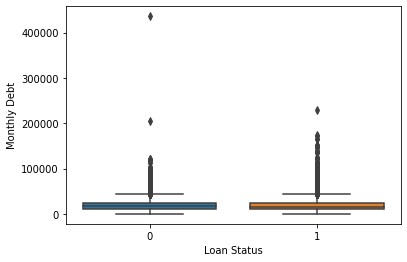

In [39]:
sns.boxplot(data = train, x = 'Loan Status', y = 'Monthly Debt')

<AxesSubplot:xlabel='Monthly Debt', ylabel='Count'>

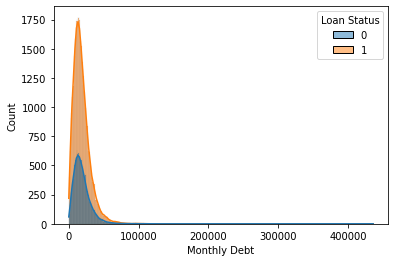

In [40]:
sns.histplot(train, x = 'Monthly Debt', hue = 'Loan Status', kde = True)

In [72]:
train[train['Monthly Debt'] > 80000]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
451,b5b13f71-0ff6-4da4-b7e3-9ddf539c90ec,ea4d01b3-bfe1-4759-b165-10a3043c7257,1,762696,Long Term,656.0,6906766.0,3 years,Home Mortgage,Debt Consolidation,86334.48,31.2,NaN,13,0,1376474,1728650.0,0.0,0.0
513,ecd1fd54-09c8-4e04-9787-3349f955e882,0089b9a3-1e98-40dd-9f2e-85aae2a6cb4a,0,423676,Short Term,NaN,NaN,4 years,Home Mortgage,Debt Consolidation,97671.02,19.7,33.0,22,0,676951,917840.0,0.0,0.0
744,798fc913-785a-46dd-a6df-5d5cb62fc726,1a7a407e-f91c-44ea-80ed-f5f4f890a394,1,99999999,Short Term,723.0,9057984.0,2 years,Home Mortgage,Debt Consolidation,105676.48,23.1,4.0,15,0,149720,912428.0,0.0,0.0
2193,cfa99593-f928-43e5-bc0f-5c04ab7f5f7c,69d0881b-d48d-4453-8286-85c4cb3681a0,1,656370,Long Term,647.0,3779100.0,9 years,Home Mortgage,Debt Consolidation,106444.65,12.5,NaN,10,0,572166,975722.0,0.0,0.0
3600,171ff4bd-baab-4560-ab20-e47a17aa8ca1,e681595c-a783-4795-abdc-aa2bbff13e89,0,221540,Short Term,619.0,4747625.0,6 years,Rent,Medical Bills,98513.29,17.3,59.0,11,1,21166,187154.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96221,3dbc3b41-ad17-4b11-aa78-246c3afdc191,da31c0cc-dfae-4783-a9c9-5ad5285a9853,1,773784,Long Term,710.0,5155137.0,10+ years,Home Mortgage,Debt Consolidation,101813.97,22.9,NaN,12,0,11796435,16677694.0,0.0,0.0
96486,8042d967-a9f4-4154-88f4-3b5eeb9bbbab,838a5a63-7647-429c-ab76-c5621b066722,1,442068,Short Term,751.0,3436074.0,10+ years,Home Mortgage,Debt Consolidation,82465.70,20.1,NaN,15,1,324235,875116.0,0.0,1.0
96842,355e2f66-8c74-4f38-ab59-56b2f2d66e5c,d9dd683a-d731-4822-9fd8-2a14f2b656bc,1,786874,Short Term,738.0,13591270.0,9 years,Home Mortgage,Debt Consolidation,172156.15,21.9,16.0,14,0,2785894,10861202.0,0.0,0.0
97354,0c5ba611-6e89-4d89-b4a0-fa42051af34c,5e4fcc28-bebb-4d55-ba6c-c63071db8a3c,0,666732,Short Term,NaN,NaN,2 years,Home Mortgage,Debt Consolidation,87827.50,24.6,NaN,18,0,466507,751278.0,0.0,0.0


<AxesSubplot:xlabel='Monthly Debt', ylabel='Count'>

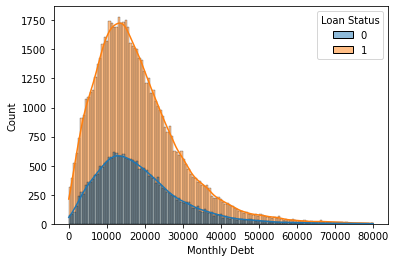

In [41]:
sns.histplot(train[train['Monthly Debt'] <= 80000], x = 'Monthly Debt', 
             hue = 'Loan Status', kde = True)

<AxesSubplot:xlabel='Monthly Debt', ylabel='Count'>

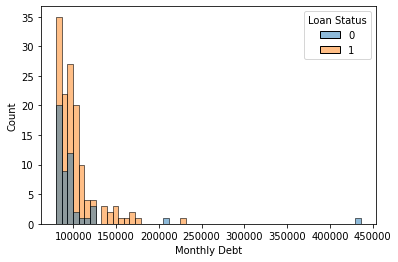

In [42]:
sns.histplot(train[train['Monthly Debt'] > 80000], x = 'Monthly Debt', 
             hue = 'Loan Status')

<AxesSubplot:xlabel='Monthly Debt', ylabel='Credit Score'>

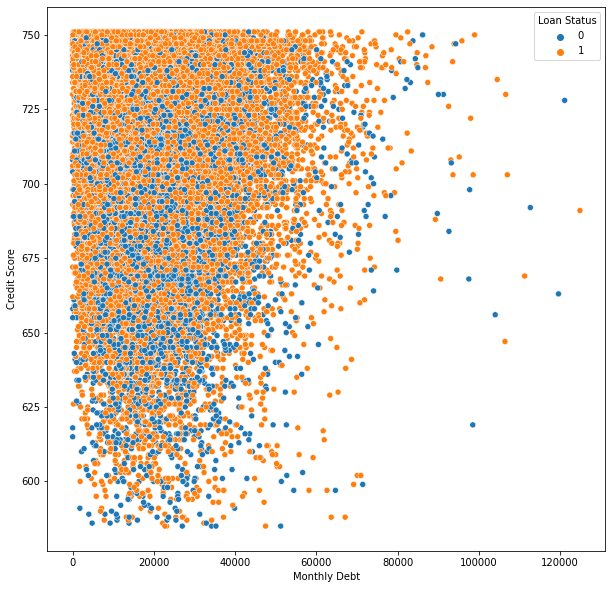

In [43]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.scatterplot(data = train[(train['Current Loan Amount']<=900000)
                            & (train['Annual Income'] <= 5000000)
                            & (train['Credit Score'] <= 800)], 
                x = 'Monthly Debt', 
                y = 'Credit Score', 
                hue = 'Loan Status')

<AxesSubplot:xlabel='Monthly Debt', ylabel='Annual Income'>

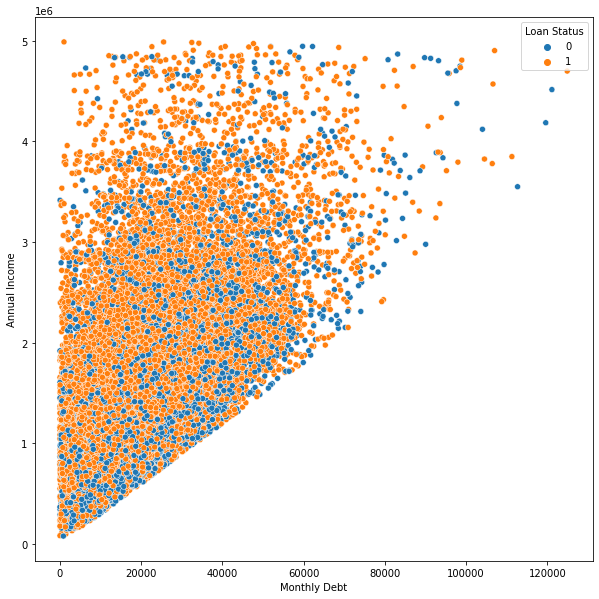

In [44]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.scatterplot(data = train[(train['Current Loan Amount']<=900000)
                            & (train['Annual Income'] <= 5000000)], 
                x = 'Monthly Debt', 
                y = 'Annual Income', 
                hue = 'Loan Status')

Видно, что есть ограничение на ежемесячный платеж в зависимости от годового дохода. 

#### Количество лет кредитной истории

<AxesSubplot:xlabel='Years of Credit History', ylabel='Count'>

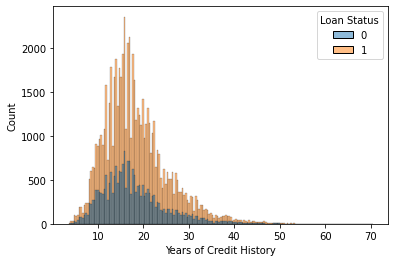

In [45]:
sns.histplot(train, x = 'Years of Credit History', hue = 'Loan Status')

#### Количество месяцев с последнего нарушения условий кредита

<AxesSubplot:xlabel='Months since last delinquent', ylabel='Count'>

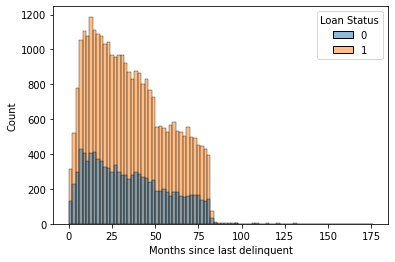

In [46]:
sns.histplot(train, x = 'Months since last delinquent', hue = 'Loan Status')

#### Количество открытых кредитных карт

<AxesSubplot:xlabel='Number of Open Accounts', ylabel='count'>

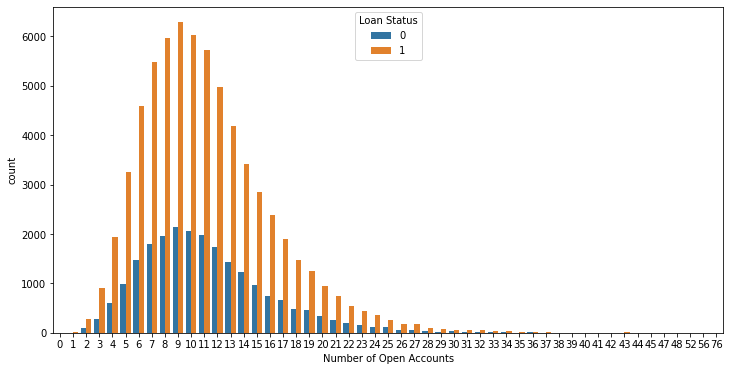

In [47]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x = 'Number of Open Accounts', data = train, hue = 'Loan Status')

#### Количество кредитных проблем

<AxesSubplot:xlabel='Number of Credit Problems', ylabel='count'>

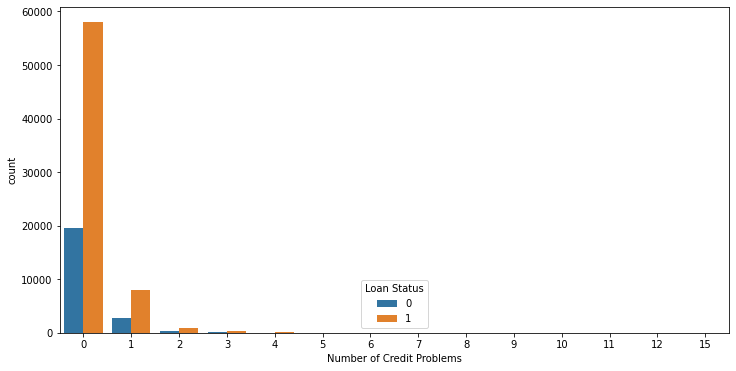

In [48]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x = 'Number of Credit Problems', data = train, hue = 'Loan Status')

<AxesSubplot:xlabel='Number of Credit Problems', ylabel='count'>

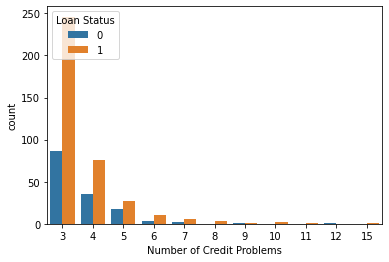

In [49]:
sns.countplot(x = 'Number of Credit Problems', 
              data = train[train['Number of Credit Problems'] > 2], 
              hue = 'Loan Status')

<AxesSubplot:xlabel='Number of Credit Problems', ylabel='count'>

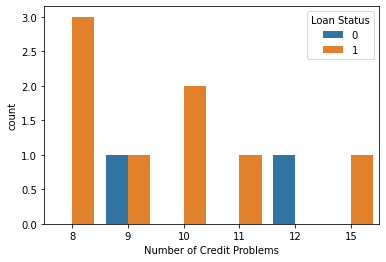

In [50]:
sns.countplot(x = 'Number of Credit Problems', 
              data = train[train['Number of Credit Problems'] > 7], 
              hue = 'Loan Status')

#### Суммарный текущий долг

<AxesSubplot:xlabel='Loan Status', ylabel='Current Credit Balance'>

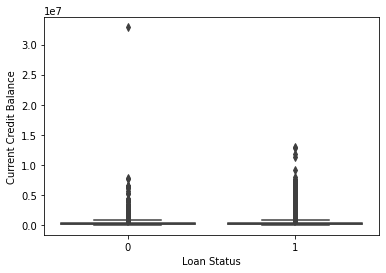

In [51]:
sns.boxplot(data = train, x = 'Loan Status', y = 'Current Credit Balance')

<AxesSubplot:xlabel='Current Credit Balance', ylabel='Count'>

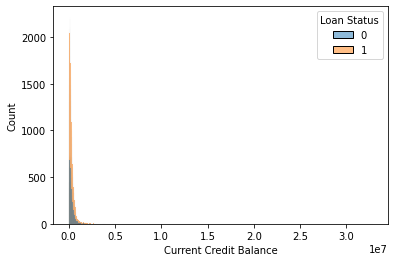

In [52]:
sns.histplot(train, x = 'Current Credit Balance', hue = 'Loan Status')

<AxesSubplot:xlabel='Current Credit Balance', ylabel='Count'>

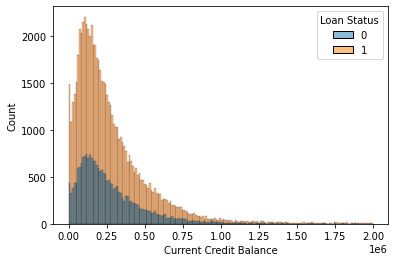

In [53]:
sns.histplot(train[train['Current Credit Balance'] <= 2000000], 
             x = 'Current Credit Balance', 
             hue = 'Loan Status')

<AxesSubplot:xlabel='Current Credit Balance', ylabel='Count'>

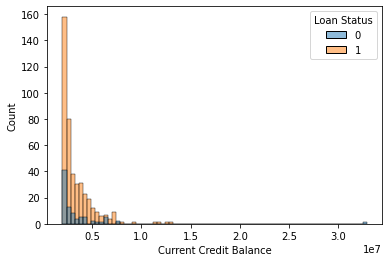

In [54]:
sns.histplot(train[train['Current Credit Balance'] > 2000000], 
             x = 'Current Credit Balance', 
             hue = 'Loan Status')

<AxesSubplot:xlabel='Current Credit Balance', ylabel='Credit Score'>

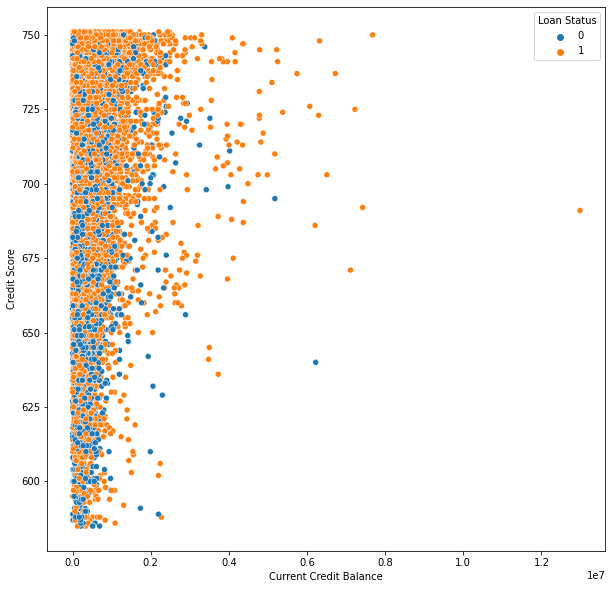

In [55]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.scatterplot(data = train[(train['Current Loan Amount']<=900000)
                            & (train['Annual Income'] <= 5000000)
                            & (train['Credit Score'] <= 800)], 
                x = 'Current Credit Balance', 
                y = 'Credit Score', 
                hue = 'Loan Status')

#### Максимальный кредитный лимит из всех источников

<AxesSubplot:xlabel='Loan Status', ylabel='Maximum Open Credit'>

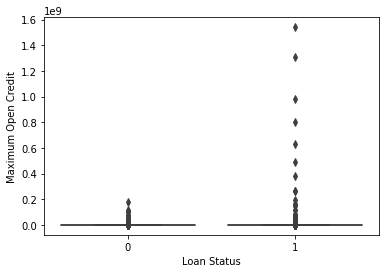

In [56]:
sns.boxplot(data = train, x = 'Loan Status', y = 'Maximum Open Credit')

In [73]:
train[train['Maximum Open Credit'] > 2000000]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
17,24e8c8bd-d10b-4dac-8b81-1da470ff5ecb,967e8733-7189-49b7-a3ab-6a1d0e1abdac,1,666204,Long Term,723.0,1821967.0,10+ years,Home Mortgage,Debt Consolidation,17612.24,22.0,34.0,15,0,813694,2004618.0,0.0,0.0
63,a80790da-0712-4c82-ab49-753c7878c5a0,c5e8d25e-4417-4e67-ac03-9d5cf3f903ca,1,602008,Long Term,741.0,2896721.0,2 years,Own Home,Debt Consolidation,48278.62,19.6,32.0,17,0,5246261,11887678.0,0.0,0.0
74,3924da4c-a6f7-4852-8fa4-c0ed8a6e903d,8980b1b1-7f07-49c7-a4f7-4268a61210f5,1,767536,Long Term,724.0,6628720.0,10+ years,Home Mortgage,Debt Consolidation,53747.96,29.5,NaN,13,0,1426425,2510112.0,0.0,0.0
92,97a3b948-4883-442e-a362-1a0751bf6d9e,4cc38eb2-c463-493a-82e9-1571bacc69a9,1,270116,Short Term,NaN,NaN,2 years,Home Mortgage,Debt Consolidation,15649.92,31.3,NaN,22,0,648850,3996322.0,0.0,0.0
137,ff1bdcef-f148-49e5-9cdf-f6c77f4d8a67,1ad6919e-0fe1-4628-94a6-69bbd7cb8edc,1,460152,Short Term,NaN,NaN,10+ years,Own Home,Debt Consolidation,21330.92,20.5,6.0,13,0,1220978,5396072.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99920,59498e1e-2e49-498d-a10c-822b4f0c7fa8,e47cc0f3-6ec3-4743-987b-32d08db55d12,1,221276,Short Term,749.0,1356828.0,10+ years,Home Mortgage,Home Improvements,5958.78,42.1,NaN,9,0,200450,2578840.0,0.0,0.0
99930,fe3ae549-f563-4bed-aba5-6100bb7eccef,544e375d-9152-45ad-bee6-8fa7fd5bd383,1,99999999,Short Term,746.0,3553323.0,10+ years,Home Mortgage,Business Loan,29225.99,16.6,NaN,14,0,988874,2400442.0,0.0,0.0
99951,2ff2c5d0-bf24-4241-a9b4-8eeaff8724ab,4ec8ccaf-9aeb-45b7-aa58-b46f9c3dac2e,1,354398,Long Term,NaN,NaN,3 years,Own Home,Debt Consolidation,15343.07,31.5,15.0,13,0,341582,2551758.0,0.0,0.0
99964,a821a0c4-5188-45f0-aaaf-080f13722667,8fd83f55-c957-42d6-9f5b-47fa965e57c5,1,119636,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,15795.27,18.5,NaN,7,0,2163891,24091892.0,0.0,0.0


<AxesSubplot:xlabel='Maximum Open Credit', ylabel='Count'>

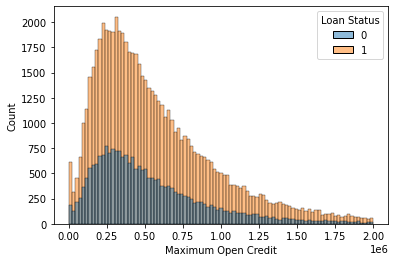

In [57]:
sns.histplot(train[train['Maximum Open Credit'] <= 2000000], x = 'Maximum Open Credit', hue = 'Loan Status')

<AxesSubplot:xlabel='Maximum Open Credit', ylabel='Credit Score'>

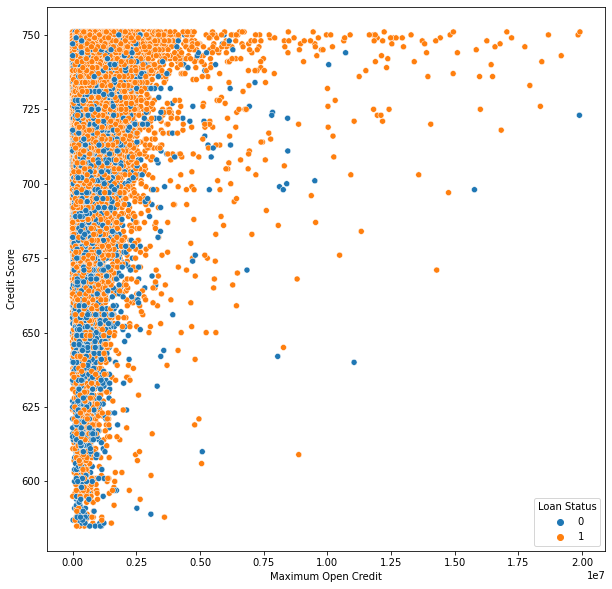

In [59]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.scatterplot(data = train[(train['Current Loan Amount']<=900000)
                            & (train['Annual Income'] <= 5000000)
                            & (train['Maximum Open Credit'] <= 20000000)
                            & (train['Credit Score'] <= 800)], 
                x = 'Maximum Open Credit', 
                y = 'Credit Score', 
                hue = 'Loan Status')

#### Количество банкроств

<AxesSubplot:xlabel='Bankruptcies', ylabel='count'>

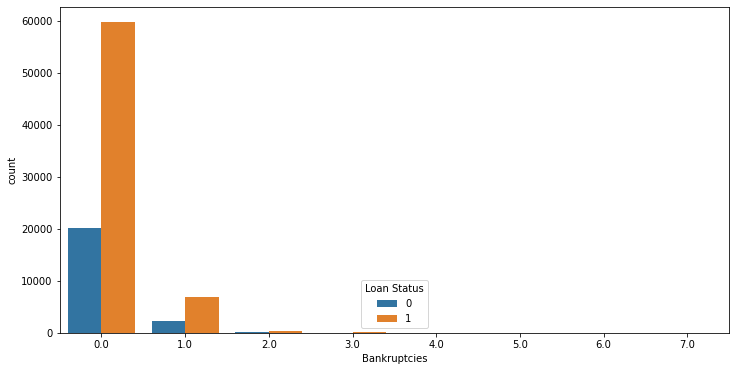

In [60]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x = 'Bankruptcies', data = train, hue = 'Loan Status')

#### Количество нарушений налогового законодательства

<AxesSubplot:xlabel='Tax Liens', ylabel='count'>

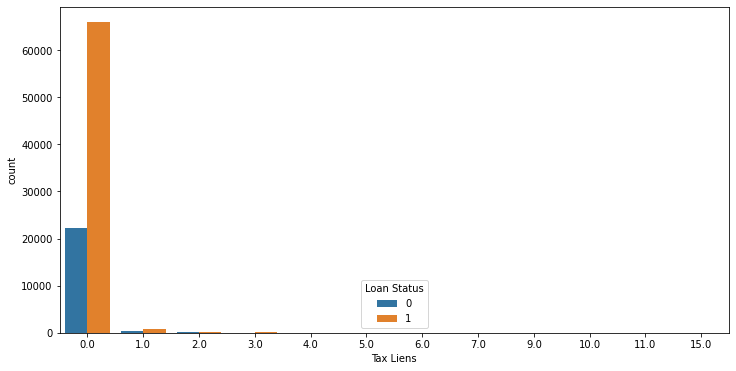

In [61]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x = 'Tax Liens', data = train, hue = 'Loan Status')

In [62]:
numerical_features = ['Current Loan Amount', 'Credit Score', 'Annual Income', 
                      'Monthly Debt', 'Years of Credit History', 
                      'Months since last delinquent', 'Number of Open Accounts', 
                      'Number of Credit Problems', 'Current Credit Balance',
                      'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']

In [63]:
categorical_features = ['Term', 'Home Ownership', 'Purpose', 'Years in current job']

### Значимость признаков

#### Значимость числовых признаков

Значимость числовых переменных оценим методом, в основе которого лежит однофакторный дисперсионный анализ (ANOVA). Основу процедуры составляет обобщение результатов двух выборочных t-тестов для независимых выборок (2-sample t). 

В качестве меры значимости будем использовать значение f-статистики. Чем значение статистики выше, тем меньше вероятность того, что средние значения не отличаются, и тем важнее данный признак для линейной модели.

<AxesSubplot:>

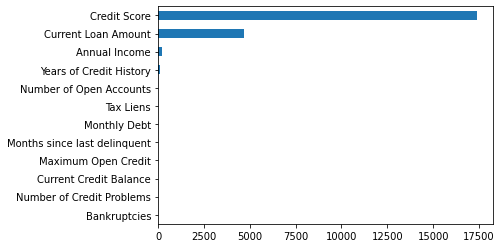

In [64]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
train_copy = train.copy()
num_imp = imputer.fit_transform(train_copy[numerical_features])
importance_num = pd.Series(f_classif(num_imp, 
                 train['Loan Status'])[0],
                 index = numerical_features)
importance_num.sort_values(inplace = True)
importance_num.plot(kind = 'barh')

#### Значимость категориальных признаков

Значимость категориальных признаков оценим с помощью непараметрических методов, основанных на оценке энтропии в группах категориальных переменных.

<AxesSubplot:>

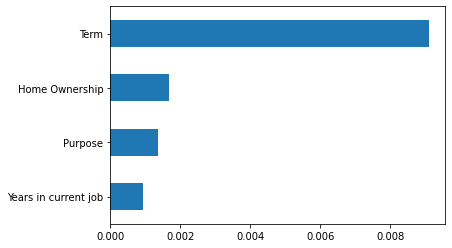

In [65]:
label_encoder = preprocessing.LabelEncoder()
for column in categorical_features:
    train_copy[column] = label_encoder.fit_transform(train_copy[column])

importance_cat = pd.Series(mutual_info_classif(train_copy[categorical_features], 
                                     train_copy['Loan Status'],
                                     discrete_features =True), 
                                                   index = categorical_features)
                                                  
importance_cat.sort_values(inplace = True)
importance_cat.plot(kind = 'barh')

### Линейные коэффициенты корреляции Пирсона

Данные с выбросами

<AxesSubplot:>

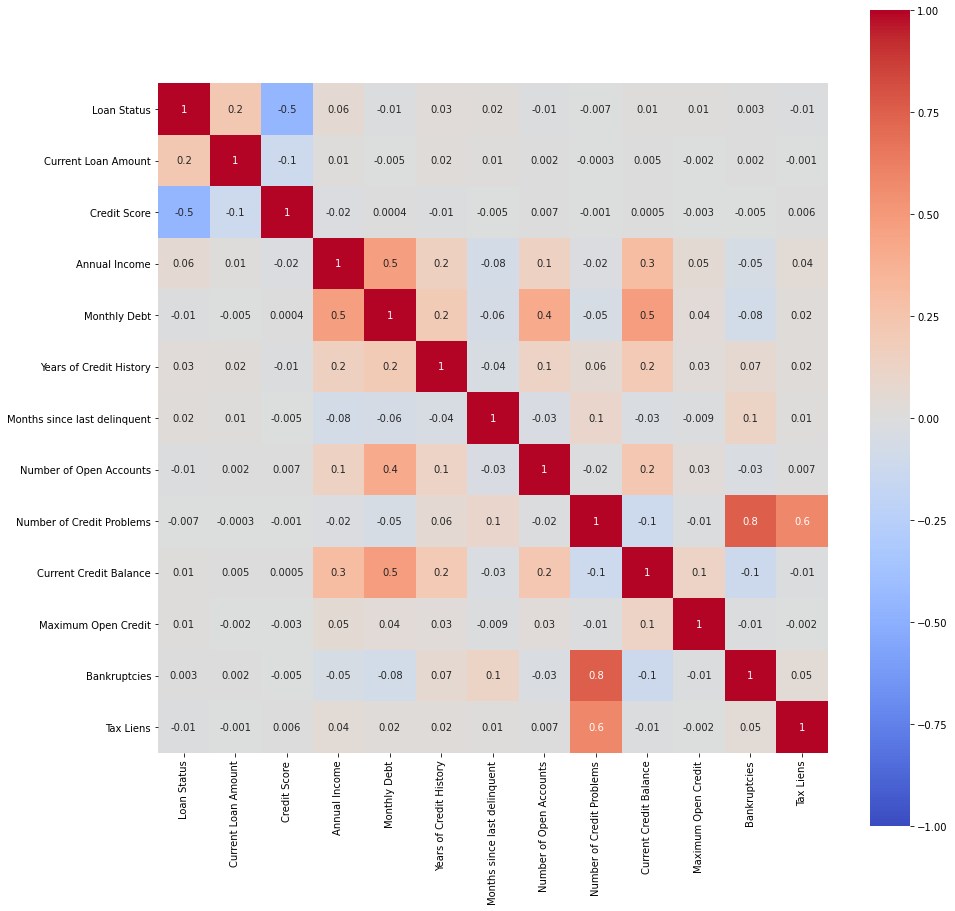

In [69]:
plt.subplots(figsize=(15,15))
sns.heatmap(train.corr(), annot = True,square=True, fmt='.1g',
           vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

Данные без выбросов

<AxesSubplot:>

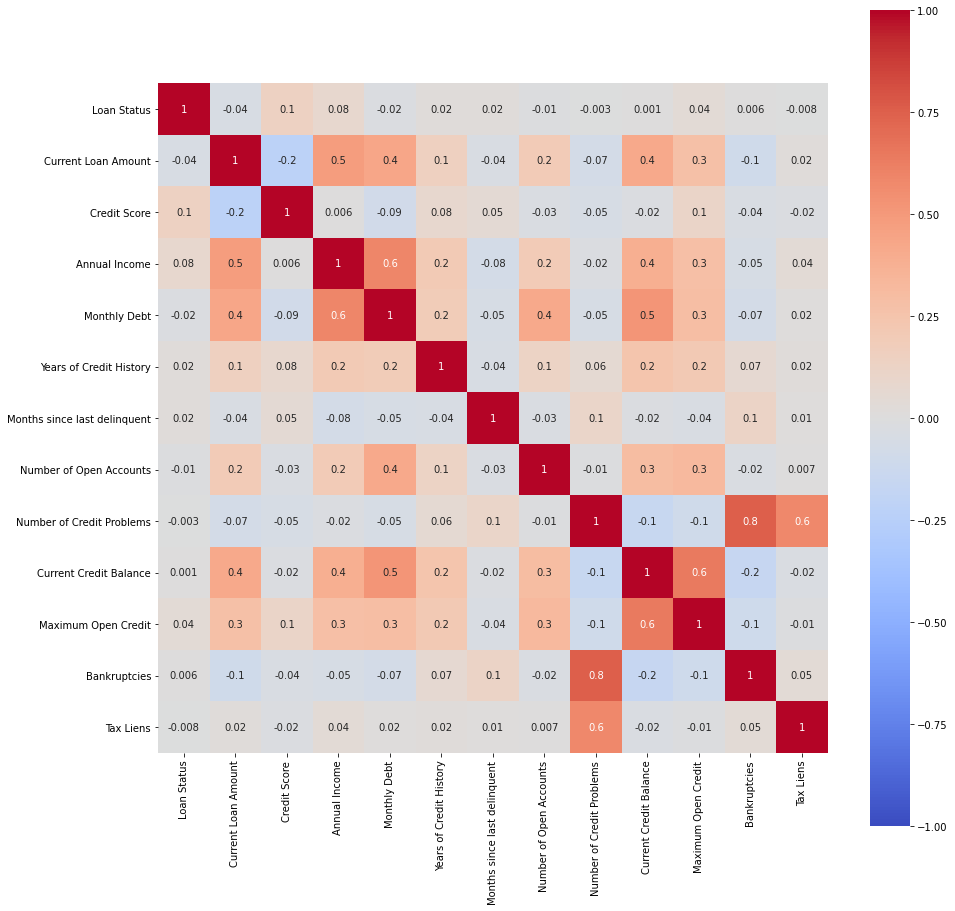

In [84]:
plt.subplots(figsize=(15,15))
sns.heatmap(train[(train['Current Loan Amount']<=900000)
                  & (train['Annual Income'] <= 5000000)
                  & (train['Credit Score'] <= 800) 
                  & (train['Maximum Open Credit'] <= 20000000)
                  & (train['Current Credit Balance'] <= 2000000)
                 ].corr(), 
            annot = True,
            square=True, 
            fmt='.1g', 
            vmin=-1, vmax=1, center= 0, 
            cmap= 'coolwarm')

Из тепловой карты коэффициентов корреляции Пирсона видно, что наибольшая степень корреляции наблюдается между количеством банкроств и количеством кредитных проблем (r = 0.8).

Кроме того, количество кредитных проблем сильно коррелирует с количеством нарушений налогового законодательства" (r = 0.6).


Также наблюдается корреляция суммарного текущего долга с максимальным кредитным лимитом из всех источников (r = 0.6), размером кредита (r = 0.4), годовым доходом (r = 0.4) и размером ежемесячного платежа по текущим кредитам (r = 0.5).

При этом годовой доход клиента также коррелирует с ежемесячным платежом (r = 0.6) и размером кредита (r = 0.5), а размер ежемесячного платежа - с размером кредита (r = 0.4) и количеством открытых кредитных карт (r = 0.4).

### Выводы

1. В тренировочном датасете выявлены полные дубликаты в данных.
2. Показано, что наблюдается невысокая степень несбалансированности классов (приблизительно 1 : 3).
3. Множество значений таких признаков как "Кредитный рейтинг", "Годовой доход", "Стаж на текущем месте работы" и "Количество месяцев с последнего нарушения условий кредита" не заполнены. 
4. Такие атрибуты как "Размер кредита", "Кредитный рейтиг", "Годовой доход", "Суммарный текущий долг" и "Максимальный кредитный лимит из всех источников", содержат выбросы.
5. С помощью статистических методов оценена значимость признаков. Показано, что среди числовых признаков самыми значимыми являеются кредитный рейтинг и размер кредита, а среди категориальных - срок кредита. 
6. Между некоторыми признаками выявлена линейная корреляция Пирсона с коэффициентом, достигающим 0.8. Наблюдаемые линейные статистические взаимосвязи не противоречат бизнес-смыслу коррелирующих показателей. 